### Example 1.1 (Exact vs. Asymptotic Enumeration for Unlabeled Graphs)

Brief computational investigation of unlabeled graphs and their asymptotic behaviour. More details can be found in the Sage [Graph Theory documentation](https://doc.sagemath.org/html/en/reference/graphs/index.html).  
*Requirements: Internet access (partially)*

In [1]:
# The graphs command allows one to generate all unlabeled graphs on a fixed number of nodes
# Note: Sage gives the nodes labels but only generates one graph per automorphism class
list(graphs(2))

[Graph on 2 vertices, Graph on 2 vertices]

In [2]:
# Get list of graphs up to 8 vertices
# (No claim of efficiency -- this blows up quickly)
GRAPHS = [list(graphs(k)) for k in range(9)]

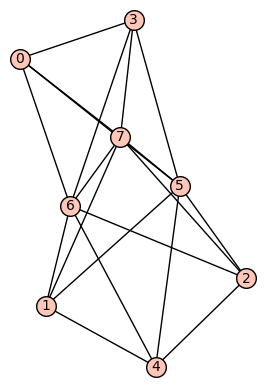

In [3]:
# A graph on 8 vertices
show(GRAPHS[8][10000])

In [4]:
# Generate the counting sequence for the number of graphs
count = [len(k) for k in GRAPHS]
count

[1, 1, 2, 4, 11, 34, 156, 1044, 12346]

In [5]:
# Search the Online Encyclopedia of Integer Sequences for sequences beginning with "count"
# (NOTE: From here down Sage requires an internet connection)
oe_seqs = oeis(count)
oe_seqs

0: A000088: Number of graphs on n unlabeled nodes.

In [6]:
# Only one sequence in the OEIS has this start, and indeed it is unlabeled graphs
# We can read additional terms in the counting sequence from the OEIS
seq = oe_seqs[0]
seq.first_terms()

(1,
 1,
 2,
 4,
 11,
 34,
 156,
 1044,
 12346,
 274668,
 12005168,
 1018997864,
 165091172592,
 50502031367952,
 29054155657235488,
 31426485969804308768,
 64001015704527557894928,
 245935864153532932683719776,
 1787577725145611700547878190848,
 24637809253125004524383007491432768)

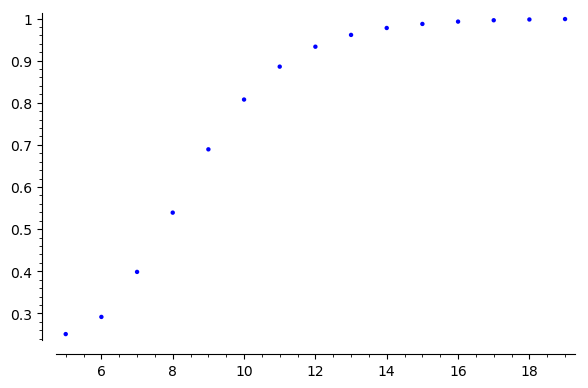

In [7]:
# These terms already get close to the known asymptotic behaviour
def asm(n): return 2^binomial(n,2)/factorial(n)
def exact(n): return seq.first_terms()[n]
point([[n,asm(n)/exact(n)] for n in range(5,20)])

In [8]:
# A list of counting formulas from the OEIS
seq.formulas()

 0: a(n) = 2^binomial(n, 2)/n!*(1+(n^2-n)/2^(n-1)+8*n!/(n-4)!*(3*n-7)*(3*n-9)/2^(2*n)+O(n^5/2^(5*n/2))) (see Harary, Palmer reference). - _Vladeta Jovovic_ and _Benoit Cloitre_, Feb 01 2003
 1: a(n) = 2^binomial(n, 2)/n!*[1+2*n$2*2^{-n}+8/3*n$3*(3n-7)*2^{-2n}+64/3*n$4*(4n^2-34n+75)*2^{-3n}+O(n^8*2^{-4*n})] where n$k is the falling factorial: n$k = n(n-1)(n-2)...(n-k+1). - _Keith Briggs_, Oct 24 2005
 2: From David Pasino (davepasino(AT)yahoo.com), Jan 31 2009: (Start)
 3: a(n) = a(n, 2), where a(n, t) is the number of t-uniform hypergraphs on n unlabeled nodes (cf. A000665 for t = 3 and A051240 for t = 4).
 4: a(n, t) = Sum_{c : 1*c_1+2*c_2+...+n*c_n=n} per(c)*2^f(c), where:
 5: ..per(c) = 1/(Product_{i=1..n} c_i!*i^c_i);
 6: ..f(c) = (1/ord(c)) * Sum_{r=1..ord(c)} Sum_{x : 1*x_1+2*x_2+...+t*x_t=t} Product_{k=1..t} binomial(y(r, k; c), x_k);
 7: ..ord(c) = lcm{i : c_i>0};
 8: ..y(r, k; c) = Sum_{s|r : gcd(k, r/s)=1} s*c_(k*s) is the number of k-cycles of the r-th power of a permutation